Visualizing  Distribution of chemicals linked by machine learning algorithm with anti-<i>Salmonella Typhimurium</i> activity of essential oils


In [93]:
import pandas as pd
from ast import literal_eval

# Define the base path and the list of file identifiers
base_path = "/Users/mariiakokina/Documents/eo_database/SOM/features/"
file_ids = [875, 1607, 1750, 1602, 1365, 1853, 1930, 741]



# Initialize a dictionary to hold the structures, their corresponding chemical names, and file bit numbers
structures_to_names_and_bits = {}

# Iterate through the list of file identifiers
for file_id in file_ids:
    # Construct the filename
    filename = f"{base_path}Bit_{file_id}_updated.csv"
    
    # Read the CSV file
    try:
        df = pd.read_csv(filename)
        
        # Iterate over each row in the dataframe
        for index, row in df.iterrows():
            # Safely evaluate the string representation of the list in BitInterpretations column
            tuples_list = literal_eval(row['BitInterpretations'])
            
            # Extract the fourth element (structure) from each tuple
            for tup in tuples_list:
                structure = tup[3]
                chemical_name = row['Chemical_name']
                
                # Initialize dictionary entry if not present
                if structure not in structures_to_names_and_bits:
                    structures_to_names_and_bits[structure] = {'names': set(), 'bits': []}
                
                # Add the chemical name to the set (to avoid duplicates) and bit number to the list
                structures_to_names_and_bits[structure]['names'].add(chemical_name)
                if file_id not in structures_to_names_and_bits[structure]['bits']:
                    structures_to_names_and_bits[structure]['bits'].append(file_id)
    except FileNotFoundError:
        print(f"File not found: {filename}")
    except Exception as e:
        print(f"Error reading file {filename}: {e}")

# Prepare data for DataFrame
data_for_df = []
for structure, info in structures_to_names_and_bits.items():
    # Convert bit numbers list to a string for display
    bits_str = ', '.join(map(str, info['bits']))
    # Append tuple for each structure with its bit numbers, count of unique names, and concatenated chemical names
    data_for_df.append((structure, bits_str, len(info['names']), ', '.join(info['names'])))

# Create a DataFrame
df_structures_names_bits = pd.DataFrame(data_for_df, columns=['Substructure', 'Morgan Fingerprint Bit Number', 'Number of Occurrences', 'Chemical'])

# Save the DataFrame to a CSV file
csv_file_path = "active_against_salmoella.csv"
df_structures_names_bits.to_csv(csv_file_path, index=False)

print(f"Data saved to {csv_file_path}")


Data saved to active_against_salmoella.csv


In [104]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.io import write_image


# Define the base path and the list of file identifiers
base_path = "features/"
file_ids = [875, 1607, 1750, 1602, 1365, 1853, 1930, 741]

# Initialize an empty list to hold the chemical names from all files
all_chemical_names = []

# Iterate through the list of file identifiers
for file_id in file_ids:
    # Construct the filename using the corrected pattern
    filename = f"{base_path}Bit_{file_id}_updated.csv"
    
    # Read the CSV file
    try:
        df = pd.read_csv(filename)
        
        # Extract the 'Chemical_name' column and add it to the list
        all_chemical_names.extend(df['Chemical_name'].tolist())
    except FileNotFoundError:
        print(f"File not found: {filename}")
    except Exception as e:
        print(f"Error reading file {filename}: {e}")

# Convert the list of chemical names to a DataFrame for easy counting
chemical_names_df = pd.DataFrame(all_chemical_names, columns=['Chemical_name'])

# Count the occurrences of each chemical name
chemical_name_counts = chemical_names_df['Chemical_name'].value_counts()

# Print the counts
print(chemical_name_counts)

# Filter the counts to separate those chemicals present more than 6 times
more_than_three = chemical_name_counts[chemical_name_counts > 6]
others_count = chemical_name_counts[chemical_name_counts <= 6].sum()

# Adding the "Others" category
if others_count > 0:
    more_than_three = more_than_three.append(pd.Series(others_count, index=['Others']))


# Convert to DataFrame for Plotly
df_more_than_three = more_than_three.reset_index()
df_more_than_three.columns = ['Chemical', 'Count']

# Define a custom color palette
colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1', '#FAD0C4', '#FF9F9A', '#FAB0E4']

# Creating the pie chart with uniformly separated slices
fig = go.Figure(data=[go.Pie(labels=df_more_than_three['Chemical'],
                             values=df_more_than_three['Count'],
                             pull=0.05,  # Uniformly pull away all slices
                             marker_colors=colors,
                             textinfo='percent+label',
                             outsidetextfont=dict(size=12),  # Ensure outside text is visible
                             textposition='outside',  # Place labels outside with lines connecting to slices
                             hoverinfo='label+percent',
                             insidetextorientation='radial',
                            )])

# Update the layout with the desired title and font settings
fig.update_layout(
    font=dict(family="EB Garamond, serif", size=12, color="black"),
    title=dict(text='Distribution of chemicals linked by random forest algorithm with anti-<i>Salmonella Typhimurium</i> activity of essential oils',
               x=0.5,
               font=dict(family="EB Garamond, serif", size=12, color="black")),
    legend_title_font=dict(family="EB Garamond, serif", size=12, color="black"),
    legend_font=dict(family="EB Garamond, serif", size=12, color="black")
)

# Show the figure
fig.show()

file_path = "charts/chemicals_linked_with_anti_salmonella_activity.png"
fig.write_image(file_path, scale=3)

print(f"Image saved to {file_path}")

Carvacrol                            136
para-Cymene                           45
Thymol                                36
Eugenol                               28
2-Hydroxy-4-methoxy-acetophenone       4
Eugenyl acetate                        4
Cuminaldehyde                          3
Coumarins                              3
Furfural                               3
ar-Turmerone                           3
Methyl thymol                          2
2-Phenylethanol                        2
Methyl benzoate                        2
Methyl chavicol                        1
Diosphenol                             1
p-Cresyl methyl ether                  1
Isodiosphenol                          1
alpha-Turmerone                        1
Methyl (Z)-cinnamate                   1
Coumarin                               1
Ethyl cinnamate                        1
Ethyl (E)-4-methoxycinnamate           1
Allyl-2,3,4,5-tetramethoxybenzene      1
Cinnamyl aldehyde                      1
Anethole        

/var/folders/x1/3wgmd54s6b7f7xc3rq_f0tdw0000gn/T/ipykernel_41099/3915111142.py:45: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Image saved to charts/chemicals_linked_with_anti_salmonella_activity.png


Visualizing  Distribution of chemicals linked by machine learning algorithm with no anti-<i>Salmonella Typhimurium</i> activity of essential oils


In [95]:
import pandas as pd
from ast import literal_eval

# Define the base path and the list of file identifiers
base_path = "/Users/mariiakokina/Documents/eo_database/SOM/features/"
file_ids = [1309, 1574, 383, 1950, 171, 549, 287]



# Initialize a dictionary to hold the structures, their corresponding chemical names, and file bit numbers
structures_to_names_and_bits = {}

# Iterate through the list of file identifiers
for file_id in file_ids:
    # Construct the filename
    filename = f"{base_path}Bit_{file_id}_updated.csv"
    
    # Read the CSV file
    try:
        df = pd.read_csv(filename)
        
        # Iterate over each row in the dataframe
        for index, row in df.iterrows():
            # Safely evaluate the string representation of the list in BitInterpretations column
            tuples_list = literal_eval(row['BitInterpretations'])
            
            # Extract the fourth element (structure) from each tuple
            for tup in tuples_list:
                structure = tup[3]
                chemical_name = row['Chemical_name']
                
                # Initialize dictionary entry if not present
                if structure not in structures_to_names_and_bits:
                    structures_to_names_and_bits[structure] = {'names': set(), 'bits': []}
                
                # Add the chemical name to the set (to avoid duplicates) and bit number to the list
                structures_to_names_and_bits[structure]['names'].add(chemical_name)
                if file_id not in structures_to_names_and_bits[structure]['bits']:
                    structures_to_names_and_bits[structure]['bits'].append(file_id)
    except FileNotFoundError:
        print(f"File not found: {filename}")
    except Exception as e:
        print(f"Error reading file {filename}: {e}")

# Prepare data for DataFrame
data_for_df = []
for structure, info in structures_to_names_and_bits.items():
    # Convert bit numbers list to a string for display
    bits_str = ', '.join(map(str, info['bits']))
    # Append tuple for each structure with its bit numbers, count of unique names, and concatenated chemical names
    data_for_df.append((structure, bits_str, len(info['names']), ', '.join(info['names'])))

# Create a DataFrame
df_structures_names_bits = pd.DataFrame(data_for_df, columns=['Substructure', 'Morgan Fingerprint Bit Number', 'Number of Occurrences', 'Chemical'])

# Save the DataFrame to a CSV file
csv_file_path = "INactive_against_salmoella.csv"
df_structures_names_bits.to_csv(csv_file_path, index=False)

print(f"Data saved to {csv_file_path}")


Data saved to INactive_against_salmoella.csv


In [109]:
import pandas as pd
import plotly.graph_objects as go
from plotly.io import write_image

# Define the base path and the list of file identifiers
base_path = "features/"
file_ids = [1309, 1574, 383, 1950, 171, 549, 287]

# Initialize an empty list to hold the chemical names from all files
all_chemical_names = []

# Iterate through the list of file identifiers
for file_id in file_ids:
    # Construct the filename using the corrected pattern
    filename = f"{base_path}Bit_{file_id}_updated.csv"
    
    # Read the CSV file
    try:
        df = pd.read_csv(filename)
        
        # Extract the 'Chemical_name' column and add it to the list
        all_chemical_names.extend(df['Chemical_name'].tolist())
    except FileNotFoundError:
        print(f"File not found: {filename}")
    except Exception as e:
        print(f"Error reading file {filename}: {e}")

# Convert the list of chemical names to a DataFrame for easy counting
chemical_names_df = pd.DataFrame(all_chemical_names, columns=['Chemical_name'])

# Count the occurrences of each chemical name
chemical_name_counts = chemical_names_df['Chemical_name'].value_counts()

# Exclude the specified chemicals from the counts
chemicals_to_exclude = ["Carvacrol", "Perilla aldehyde", "alpha-Turmerone"]
chemical_name_counts = chemical_name_counts.drop(labels=chemicals_to_exclude, errors='ignore')

# Print the adjusted counts
print(chemical_name_counts)

# Filter the counts to separate those chemicals present more than 6 times
more_than_three = chemical_name_counts[chemical_name_counts > 10]
others_count = chemical_name_counts[chemical_name_counts <= 10].sum()

# Adding the "Others" category
if others_count > 0:
    more_than_three = more_than_three.append(pd.Series(others_count, index=['Others']))

# Convert to DataFrame for Plotly
df_more_than_three = more_than_three.reset_index()
df_more_than_three.columns = ['Chemical', 'Count']

# Define a custom color palette
colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1', '#FAD0C4', '#FF9F9A', '#FAB0E4']

# Creating the pie chart with uniformly separated slices
fig = go.Figure(data=[go.Pie(labels=df_more_than_three['Chemical'],
                             values=df_more_than_three['Count'],
                             pull=0.05,  # Uniformly pull away all slices
                             marker_colors=colors,
                             textinfo='percent+label',
                             outsidetextfont=dict(size=12),  # Ensure outside text is visible
                             textposition='outside',  # Place labels outside with lines connecting to slices
                             hoverinfo='label+percent',
                             insidetextorientation='radial',
                            )])

# Update the layout with the desired title and font settings
fig.update_layout(
    font=dict(family="EB Garamond, serif", size=12, color="black"),
    title=dict(text='Distribution of chemicals contributing to the random forest algorithm’s classification <br> of essential oils as inactive against <i>Salmonella Typhimurium</i>',
               x=0.5,
               font=dict(family="EB Garamond, serif", size=12, color="black")),
    legend_title_font=dict(family="EB Garamond, serif", size=12, color="black"),
    legend_font=dict(family="EB Garamond, serif", size=12, color="black"),
    legend=dict(orientation="v", yanchor="bottom", y=0.5, xanchor="right", x=1.5)  # Adjusted for better layout
)

# Show the figure
fig.show()

file_path = "charts/chemicals_linked_with_absence_of_anti_salmonella_activity.png"
fig.write_image(file_path, scale=3)

print(f"Image saved to {file_path}")


alpha-Pinene               64
Linalool                   31
beta-Pinene                30
delta-3-Carene             15
Geranial                   12
Linalyl acetate            10
Neral                      10
Geraniol                    8
alpha-Phellandrene          5
Myrcene                     4
Citronellol                 4
Menthone                    4
(-)-Citronellal             3
Isopinocamphone             3
alpha-Copaene               2
Bicyclogermacrene           2
alpha-Eudesmol              2
(E,Z)-alpha-Farnesene       2
Viridiflorene               2
Menthol                     2
Ledol                       2
beta-Bisabolene (tent.)     2
Neryl acetate               2
Isomenthone                 2
Geranyl acetate             2
Isodiosphenol               2
beta-Eudesmol               1
Cubenol                     1
Farnesyl acetate            1
Geranyllinalool             1
Geranic acid                1
Dill ether                  1
Citronellyl acetate         1
(Z)-beta-F

/var/folders/x1/3wgmd54s6b7f7xc3rq_f0tdw0000gn/T/ipykernel_41099/799418879.py:47: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Image saved to charts/chemicals_linked_with_absence_of_anti_salmonella_activity.png


Visualizing  Distribution of chemicals having mixed impact on model predictions of anti-<i>Salmonella Typhimurium</i> activity of essential oils

Bits set to 1: [80, 222, 294, 807, 1057, 1410]


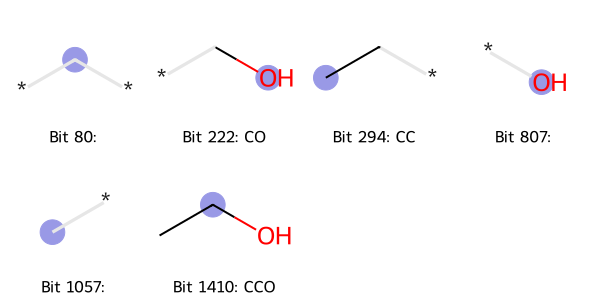

In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

# Generate the 2048 bit Morgan fingerprint for the molecule if not already done
molecule = Chem.MolFromSmiles('CCO')
fp = AllChem.GetMorganFingerprintAsBitVect(molecule, radius=2, nBits=2048)

# Get bit info for all bits set to 1
bitInfo = {}
fp = AllChem.GetMorganFingerprintAsBitVect(molecule, radius=2, nBits=2048, bitInfo=bitInfo)

# Function to find substructures corresponding to a given bit and return SMILES
def substructures_for_bit(mol, bit, bitInfo):
    substructures = []
    if bit in bitInfo:
        for atom_idx, radius in bitInfo[bit]:
            env = Chem.FindAtomEnvironmentOfRadiusN(mol, radius, atom_idx)
            submol = Chem.PathToSubmol(mol, env)
            substructures.append(Chem.MolToSmiles(submol, canonical=True))
    return substructures

# List of bit indexes that are set to 1
onBits = list(fp.GetOnBits())
print(f"Bits set to 1: {onBits}")

# Prepare tuples for drawing, including the bit info this time
tpls = [(molecule, bit, bitInfo) for bit in onBits]

# Legends for each bit including the SMILES of the hashed substructure
legends = [f"Bit {bit}: {'; '.join(substructures_for_bit(molecule, bit, bitInfo))}" for bit in onBits]

# Draw the on-bits
img = Draw.DrawMorganBits(tpls, molsPerRow=4, subImgSize=(150, 150), legends=legends)

# Save the image to a file
img.save('morgan_bits_on_with_smiles.png')

# Display the image (this works in Jupyter Notebook)
from IPython.display import Image
Image(filename='morgan_bits_on_with_smiles.png')




In [103]:
import subprocess
import os

# Define the source and target directories
source_dir = "/Users/mariiakokina/Documents/eo_database/SOM/visualizations"
target_dir = source_dir  # Assuming you want to save the PNG files in the same directory

# List all SVG files in the source directory
svg_files = [f for f in os.listdir(source_dir) if f.endswith('.svg')]

# Convert each SVG file to PNG using Inkscape
for svg_file in svg_files:
    source_path = os.path.join(source_dir, svg_file)
    target_path = os.path.join(target_dir, svg_file.replace('.svg', '.png'))
    
    # Construct the Inkscape command for conversion
    # Adding --export-dpi=300 for the DPI setting
    # Inkscape 1.0 and later versions handle transparency by default for PNG exports
    command = [
        '/Applications/Inkscape.app/Contents/MacOS/inkscape', 
        source_path, 
        '--export-dpi=300', 
        '--export-type=png', 
        '--export-filename', 
        target_path
    ]
    
    # Execute the command
    subprocess.run(command)

print("Conversion complete.")




Conversion complete.


In [110]:
import pandas as pd

def extract_dois_from_csv(csv_path):
    # Load the CSV file
    data = pd.read_csv(csv_path)
    
    # Check if 'Reference' column exists
    if 'Reference' not in data.columns:
        print("The column 'Reference' was not found in the CSV file.")
        return
    
    # Filter out rows where 'Reference' is 'No Reference' or empty and remove 'DOI:' prefix
    filtered_references = data['Reference'].dropna()
    filtered_references = filtered_references[filtered_references != 'No Reference']
    filtered_references = filtered_references.str.replace('DOI:', '').str.strip()
    
    # Prepend 'https://www.doi.org/' to each DOI
    doi_urls = ['https://www.doi.org/' + doi for doi in filtered_references]
    
    return doi_urls

# Example usage:
# Replace 'path_to_your_csv_file.csv' with the actual path to your CSV file
doi_list = extract_dois_from_csv('aggregated_plants.csv')
for doi in doi_list:
    print(doi)


https://www.doi.org/10.3390/f10111042
https://www.doi.org/10.3390/medicines4020030
https://www.doi.org/10.3389/fvets.2023.1188752
https://www.doi.org/10.3390/molecules191220034
https://www.doi.org/10.3390/molecules191220034
https://www.doi.org/10.3390/molecules24050900
https://www.doi.org/10.5281/zenodo.159101
https://www.doi.org/10.1007/s10722-013-0010-4
https://www.doi.org/10.1590/S0102-695X2013000600002
https://www.doi.org/10.1177/1934578X20915034
https://www.doi.org/10.4103/0975-7406.199342
https://www.doi.org/10.1111/1750-3841.12052
https://www.doi.org/10.4315/0362-028X-69.9.2274
https://www.doi.org/10.21010/ajtcam.v14i3.8
https://www.doi.org/10.3390/antibiotics10101191
https://www.doi.org/10.1080/13880200802055917
https://www.doi.org/10.1186/s12941-020-00371-1
https://www.doi.org/10.3390/antibiotics12020254
https://www.doi.org/10.1111/lam.13610. Epub 2021 Dec 1.
https://www.doi.org/10.3389/fvets.2023.1188752
https://www.doi.org/10.1007/s10068-017-0241-9
https://www.doi.org/10.339